In [706]:
import pandas as pd
import numpy as np

In [707]:
# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [708]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [709]:
df = pd.read_csv("train.csv")

In [710]:
df.shape

(54697, 8)

In [711]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54697 entries, 0 to 54696
Data columns (total 8 columns):
ID                               54697 non-null int64
Person A                         54697 non-null object
Person B                         54697 non-null object
Years of Knowing                 54697 non-null float64
Interaction Duration             54697 non-null float64
Interaction Type                 54697 non-null object
Moon Phase During Interaction    54697 non-null object
Friends                          54697 non-null int64
dtypes: float64(2), int64(2), object(4)
memory usage: 3.3+ MB


In [712]:
#this means that there are no null values

In [713]:
df.describe()

,ID,Years of Knowing,Interaction Duration,Friends
count,54697.000000,54697.000000,54697.000000,54697.000000
mean,27349.000000,4.650547,10.350016,0.485804
std,15789.808174,3.371210,7.013008,0.499803
min,1.000000,0.000286,0.000176,0.000000
25%,13675.000000,2.062862,4.830330,0.000000
50%,27349.000000,3.781148,9.032467,0.000000
75%,41023.000000,6.295307,14.525737,1.000000
max,54697.000000,14.999167,29.999377,1.000000


In [714]:
df["ID"] # it is of no use as it's unique for every entry and has no significance

0            1
1            2
2            3
3            4
4            5
         ...  
54692    54693
54693    54694
54694    54695
54695    54696
54696    54697
Name: ID, Length: 54697, dtype: int64

In [715]:
df.drop("ID",axis=1,inplace=True)

In [716]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54697 entries, 0 to 54696
Data columns (total 7 columns):
Person A                         54697 non-null object
Person B                         54697 non-null object
Years of Knowing                 54697 non-null float64
Interaction Duration             54697 non-null float64
Interaction Type                 54697 non-null object
Moon Phase During Interaction    54697 non-null object
Friends                          54697 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 2.9+ MB


In [717]:
len(df['Person A'].unique())  # there are 100 unique names in Person A column

100

In [718]:
df['Person A'].value_counts()   # the heighest frequency is 627 for a particular entry
                                # the lowest frequency is 472 for a particular entry

Ernestine    627
Mersey       612
Allegra      607
Melany       600
Adey         598
            ... 
Emili        487
Casandra     486
Sidonia      483
Jeane        476
Cyndy        472
Name: Person A, Length: 100, dtype: int64

In [722]:
s = df['Person A'].value_counts()

In [751]:
vc_item1 = df['Person A'].value_counts()

df['Person A']=df['Person A'].apply(lambda x: vc_item1[x])

In [731]:
len(df['Person B'].unique())  # there are 100 unique names in Person B column

100

In [732]:
df['Person B'].value_counts()  # the heighest frequency is 617 for a particular entry
                                # the lowest frequency is 483 for a particular entry

Denni         617
Wilhelmina    612
Carree        604
Georgeanne    597
Lotty         591
             ... 
Shantee       497
Taffy         496
Claresta      495
Carley        490
Saree         483
Name: Person B, Length: 100, dtype: int64

In [750]:
vc_item1 = df['Person B'].value_counts()

df['Person B']=df['Person B'].apply(lambda x: vc_item1[x])

In [734]:
df['Years of Knowing'].describe()   # here the max years of knowing is 15.26
                                    # and min years of knowing is 0

count    54697.000000
mean         4.650547
std          3.371210
min          0.000286
25%          2.062862
50%          3.781148
75%          6.295307
max         14.999167
Name: Years of Knowing, dtype: float64

In [735]:
len(df['Interaction Type'].unique())   # 6 unique values in Interaction Type

6

In [736]:
df['Interaction Type'].unique()     # namely ------
                                    #1 'Social_Media',
                                    #2 'In Passing',
                                    #3 'Over a Meal',
                                    #4 'Party',
                                    #5 'Class',
                                    #6 'At Work'

array(['Class', 'At Work', 'Over a Meal', 'Social_Media', 'Party',
       'In Passing'], dtype=object)

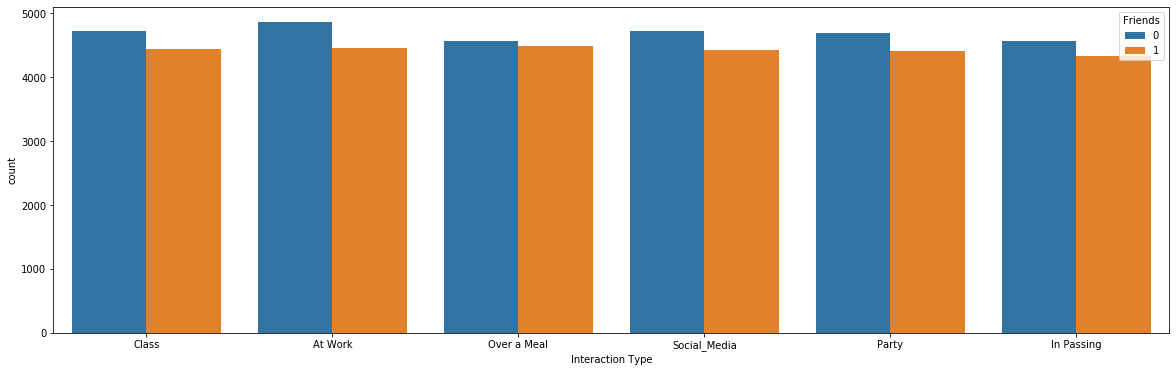

In [737]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.countplot(df['Interaction Type'],hue=df['Friends'])

In [738]:
df['Interaction Duration'].describe()   # here the max Interaction Duration is 30.86
                                        # and min Interaction Duration is 0

count    54697.000000
mean        10.350016
std          7.013008
min          0.000176
25%          4.830330
50%          9.032467
75%         14.525737
max         29.999377
Name: Interaction Duration, dtype: float64

In [739]:
# df['mult_years_dur'] = df['Years of Knowing'] + df['Interaction Duration']

In [740]:
len(df['Moon Phase During Interaction'].unique())  # 8 unique values in Moon Phase During Interaction

8

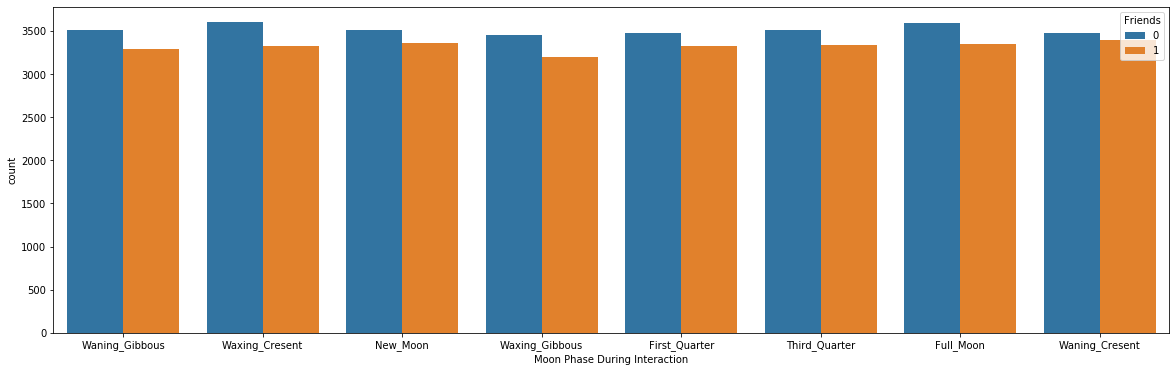

In [741]:
plt.figure(figsize=(20,6))
sns.countplot(df['Moon Phase During Interaction'],hue=df['Friends'])
plt.show()

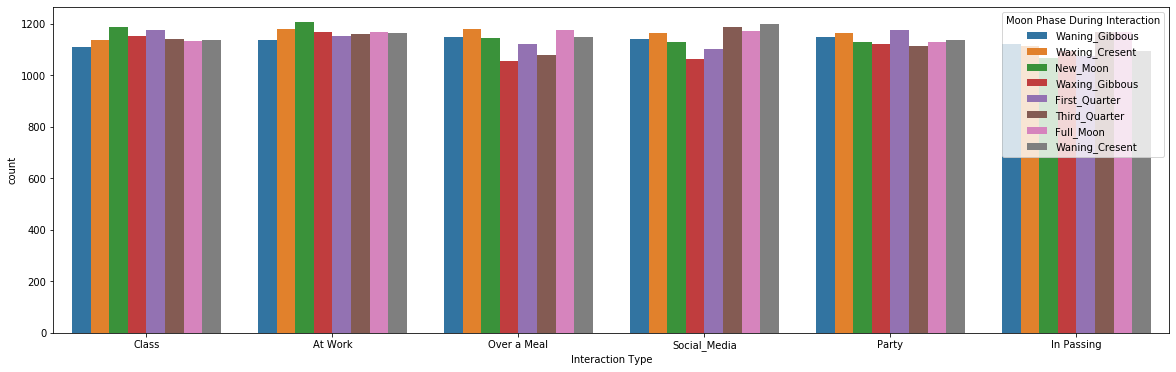

In [742]:
plt.figure(figsize=(20,6))
sns.countplot(df['Interaction Type'],hue=df['Moon Phase During Interaction'])

In [745]:
df['Moon Phase During Interaction'].unique()
# namely          

array(['Waning_Gibbous', 'Waxing_Cresent', 'New_Moon', 'Waxing_Gibbous',
       'First_Quarter', 'Third_Quarter', 'Full_Moon', 'Waning_Cresent'],
      dtype=object)

In [746]:
df['Friends'].unique()   # the target values are only 1 or 0

array([1, 0])

In [747]:
df['Friends'].value_counts()

0    28125
1    26572
Name: Friends, dtype: int64

In [752]:
X_train = df.drop(['Friends'],axis=1)


In [753]:
X_train

,Person A,Person B,Years of Knowing,Interaction Duration,Interaction Type,Moon Phase During Interaction
0,535,535,3.876560,13.035115,Class,Waning_Gibbous
1,566,517,2.836218,5.811429,At Work,Waxing_Cresent
2,542,604,3.006119,4.882863,Over a Meal,New_Moon
3,573,576,2.960067,9.274924,Social_Media,Waxing_Gibbous
4,569,564,7.640688,8.843167,Class,First_Quarter
...,...,...,...,...,...,...
54692,573,567,3.071479,14.986872,At Work,Waning_Gibbous
54693,535,561,2.475533,8.963448,Social_Media,Waxing_Cresent
54694,542,573,1.973262,2.824698,At Work,Waning_Cresent
54695,592,502,0.335327,1.738562,In Passing,Waning_Cresent


In [371]:
# from sklearn import preprocessing



# categorical = ['Person A','Person B','Interaction Type','Moon Phase During Interaction']
# # categorical = []

# for feature in categorical:
#         le = preprocessing.LabelEncoder()
#         X_train[feature] = le.fit_transform(X_train[feature])
#         X_test[feature] = le.transform(X_test[feature])


# ------------------Setting feature vector and target variable --------------------------------

In [754]:
X= df.drop(['Friends','Interaction Type','Moon Phase During Interaction'],axis=1)
# X= df


In [755]:
y = df['Friends']

In [756]:
X.head(4)

,Person A,Person B,Years of Knowing,Interaction Duration
0,535,535,3.876560,13.035115
1,566,517,2.836218,5.811429
2,542,604,3.006119,4.882863
3,573,576,2.960067,9.274924


# Split data into separate training and test set

In [813]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.001, random_state = 0)



In [814]:
print(X_test.shape)
print(X_train.shape)

(55, 4)
(54642, 4)


# Feature Engineering

Encode categorical variables

In [815]:
from sklearn import preprocessing

# categorical = ['Person A', 'Person B', 'Interaction Type', 'Moon Phase During Interaction']
categorical = []

for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


In [816]:
X_train.head()

,Person A,Person B,Years of Knowing,Interaction Duration
36801,549,546,7.445771,10.744683
11773,526,519,1.201607,2.087251
41423,571,543,6.232314,17.273898
52812,487,546,10.389375,18.594571
7701,578,597,0.653377,3.174245


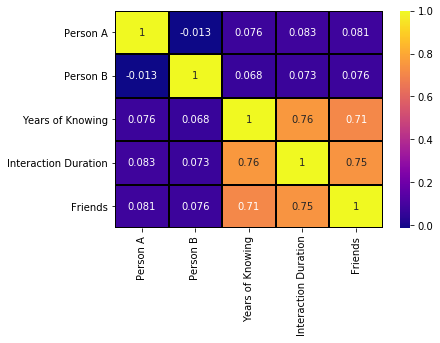

In [817]:
temp_df = df.drop(['Interaction Type','Moon Phase During Interaction'],axis=1)
tc = temp_df.corr() 
  
sns.heatmap(tc, annot = True, cmap ='plasma',  
            linecolor ='black', linewidths = 1) 


# Feature Scaling

In [818]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [819]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Title_scaler = MinMaxScaler()
# X_train_scaled = Title_scaler.fit_transform(X_train)
# X_test_scaled = Title_scaler.transform(X_test)

In [820]:
X_train.head()

,Person A,Person B,Years of Knowing,Interaction Duration
0,0.010854,-0.08568,0.828998,0.056222
1,-0.747873,-1.05390,-1.023047,-1.178207
2,0.736593,-0.19326,0.469081,0.987196
3,-2.034409,-0.08568,1.702083,1.175505
4,0.967510,1.74318,-1.185655,-1.023216


In [821]:
X_test.head()

,Person A,Person B,Years of Knowing,Interaction Duration
0,1.429343,0.70324,-0.385810,-0.040575
1,-2.529231,0.73910,-0.687294,-0.673978
2,-1.638552,1.06184,-0.641998,0.283455
3,0.670617,-1.12562,1.051690,0.334908
4,-0.483968,0.70324,-0.321386,-0.220744


# Logistic Regression model with all features

In [822]:
accuracy_dict = { 'LR':0
                }

In [823]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with all 6 the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with all 6 the features: 0.8364


In [824]:
accuracy_dict['LR']=0.9147

In [825]:
logreg.score(X_train, y_train)


0.9156143625782365

# PCA

In [826]:
from sklearn.decomposition import PCA
pca = PCA()
temp_X_train= X_train
temp_X_train = pca.fit_transform(temp_X_train)
pca.explained_variance_ratio_

array([0.44635438, 0.25321826, 0.23971648, 0.06071089])

In [827]:
# As we can see every feature adds significant variance hence
# droping the variables in this case is not a good idea! Therefore we should use every 
# feature present to build our model as done previously.

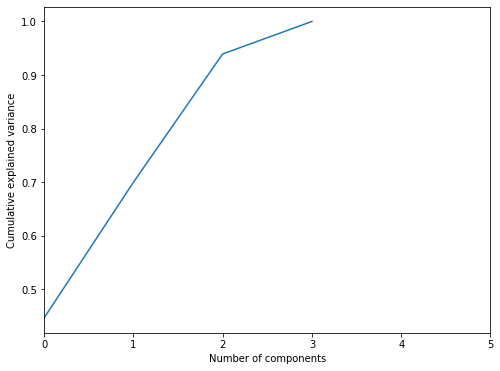

In [828]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,5,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()
# ploting cumulative explained variance ratio with number 
# of components to show how variance ratio varies with number of components.

In [829]:
# X_train = X_train.iloc[: , 0:2]


# X_test = X_test.iloc[: , 0:2]

In [830]:
# X_train['Years of Knowing']= X_train['Years of Knowing']*3
# X_train['Interaction Duration']= X_train['Interaction Duration']*1.7

In [831]:
X_train

,Person A,Person B,Years of Knowing,Interaction Duration
0,0.010854,-0.085680,0.828998,0.056222
1,-0.747873,-1.053900,-1.023047,-1.178207
2,0.736593,-0.193260,0.469081,0.987196
3,-2.034409,-0.085680,1.702083,1.175505
4,0.967510,1.743180,-1.185655,-1.023216
...,...,...,...,...
54637,0.439700,-0.229120,0.621509,-0.020562
54638,0.736593,0.129480,-0.141511,0.529630
54639,-0.483968,-1.806961,-0.267297,-0.902443
54640,-1.176718,-0.264980,0.911683,1.386128


# Decision Tree Model.

In [832]:
from sklearn.tree import DecisionTreeClassifier

In [833]:

clf = DecisionTreeClassifier(max_features=2,
                            max_depth=5,
                            )
clf.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)
y_pred = clf.predict(X_test)

print('D-Tree accuracy score with all 6 the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
clf.score(X_train, y_train)


D-Tree accuracy score with all 6 the features: 0.8545


0.9189634347205446

In [834]:
accuracy_dict['DecisionTree']=accuracy_score(y_test, y_pred)

# Xgboost

In [835]:
from xgboost import XGBClassifier

clf= XGBClassifier(learning_rate=0.05, n_estimators=206, max_depth=5,
                        min_child_weight=5, 
                         seed=27)

clf.fit(X_train, y_train)

# y_pred = logreg.predict(X_test)
y_pred = clf.predict(X_test)
print('XGboost accuracy score with all 5 the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGboost accuracy score with all 5 the features: 0.8727


In [811]:
clf.score(X_train, y_train)


0.9272599054509364

In [812]:
accuracy_dict['Xgboost']=accuracy_score(y_test, y_pred)

# catboost

In [852]:
from catboost import CatBoostClassifier

clf= CatBoostClassifier(learning_rate=0.05, n_estimators=600, max_depth=5)

clf.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)
y_pred = clf.predict(X_test)
print('catboost accuracy score with all 5 the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

0:	learn: 0.5804803	total: 146ms	remaining: 1m 27s
1:	learn: 0.4934804	total: 183ms	remaining: 54.6s
2:	learn: 0.4214028	total: 217ms	remaining: 43.2s
3:	learn: 0.3622944	total: 241ms	remaining: 35.9s
4:	learn: 0.3080238	total: 277ms	remaining: 33s
5:	learn: 0.2780542	total: 322ms	remaining: 31.9s
6:	learn: 0.2482923	total: 369ms	remaining: 31.2s
7:	learn: 0.2343410	total: 423ms	remaining: 31.3s
8:	learn: 0.2156980	total: 476ms	remaining: 31.3s
9:	learn: 0.2038050	total: 522ms	remaining: 30.8s
10:	learn: 0.1970208	total: 573ms	remaining: 30.7s
11:	learn: 0.1933392	total: 607ms	remaining: 29.7s
12:	learn: 0.1854538	total: 656ms	remaining: 29.6s
13:	learn: 0.1794692	total: 712ms	remaining: 29.8s
14:	learn: 0.1758628	total: 736ms	remaining: 28.7s
15:	learn: 0.1741012	total: 766ms	remaining: 28s
16:	learn: 0.1719856	total: 798ms	remaining: 27.4s
17:	learn: 0.1681749	total: 870ms	remaining: 28.1s
18:	learn: 0.1670631	total: 914ms	remaining: 27.9s
19:	learn: 0.1643919	total: 943ms	remaining:

164:	learn: 0.1426428	total: 6.85s	remaining: 18.1s
165:	learn: 0.1426210	total: 6.91s	remaining: 18.1s
166:	learn: 0.1425745	total: 6.96s	remaining: 18s
167:	learn: 0.1425357	total: 6.99s	remaining: 18s
168:	learn: 0.1425086	total: 7.04s	remaining: 17.9s
169:	learn: 0.1424878	total: 7.09s	remaining: 17.9s
170:	learn: 0.1424694	total: 7.14s	remaining: 17.9s
171:	learn: 0.1424298	total: 7.17s	remaining: 17.9s
172:	learn: 0.1424178	total: 7.27s	remaining: 17.9s
173:	learn: 0.1423630	total: 7.31s	remaining: 17.9s
174:	learn: 0.1423411	total: 7.37s	remaining: 17.9s
175:	learn: 0.1423154	total: 7.4s	remaining: 17.8s
176:	learn: 0.1422865	total: 7.46s	remaining: 17.8s
177:	learn: 0.1422389	total: 7.5s	remaining: 17.8s
178:	learn: 0.1422037	total: 7.54s	remaining: 17.7s
179:	learn: 0.1421743	total: 7.59s	remaining: 17.7s
180:	learn: 0.1421458	total: 7.64s	remaining: 17.7s
181:	learn: 0.1421081	total: 7.7s	remaining: 17.7s
182:	learn: 0.1420750	total: 7.74s	remaining: 17.6s
183:	learn: 0.14203

330:	learn: 0.1368589	total: 12.2s	remaining: 9.92s
331:	learn: 0.1368182	total: 12.2s	remaining: 9.88s
332:	learn: 0.1367668	total: 12.3s	remaining: 9.83s
333:	learn: 0.1367319	total: 12.3s	remaining: 9.79s
334:	learn: 0.1367026	total: 12.3s	remaining: 9.74s
335:	learn: 0.1366615	total: 12.3s	remaining: 9.69s
336:	learn: 0.1366260	total: 12.3s	remaining: 9.64s
337:	learn: 0.1365663	total: 12.4s	remaining: 9.59s
338:	learn: 0.1365131	total: 12.4s	remaining: 9.54s
339:	learn: 0.1364772	total: 12.4s	remaining: 9.49s
340:	learn: 0.1364538	total: 12.4s	remaining: 9.45s
341:	learn: 0.1364215	total: 12.5s	remaining: 9.4s
342:	learn: 0.1363904	total: 12.5s	remaining: 9.35s
343:	learn: 0.1363501	total: 12.5s	remaining: 9.3s
344:	learn: 0.1363041	total: 12.5s	remaining: 9.26s
345:	learn: 0.1362751	total: 12.6s	remaining: 9.22s
346:	learn: 0.1362468	total: 12.6s	remaining: 9.17s
347:	learn: 0.1362162	total: 12.6s	remaining: 9.12s
348:	learn: 0.1361849	total: 12.6s	remaining: 9.07s
349:	learn: 0.

498:	learn: 0.1315317	total: 16.4s	remaining: 3.32s
499:	learn: 0.1314997	total: 16.4s	remaining: 3.29s
500:	learn: 0.1314798	total: 16.5s	remaining: 3.25s
501:	learn: 0.1314446	total: 16.5s	remaining: 3.22s
502:	learn: 0.1313938	total: 16.5s	remaining: 3.18s
503:	learn: 0.1313835	total: 16.5s	remaining: 3.15s
504:	learn: 0.1313597	total: 16.5s	remaining: 3.11s
505:	learn: 0.1313336	total: 16.6s	remaining: 3.08s
506:	learn: 0.1313017	total: 16.6s	remaining: 3.04s
507:	learn: 0.1312715	total: 16.6s	remaining: 3.01s
508:	learn: 0.1312609	total: 16.6s	remaining: 2.98s
509:	learn: 0.1312386	total: 16.7s	remaining: 2.94s
510:	learn: 0.1312161	total: 16.7s	remaining: 2.9s
511:	learn: 0.1312013	total: 16.7s	remaining: 2.87s
512:	learn: 0.1311868	total: 16.7s	remaining: 2.83s
513:	learn: 0.1311496	total: 16.7s	remaining: 2.8s
514:	learn: 0.1311081	total: 16.7s	remaining: 2.76s
515:	learn: 0.1310867	total: 16.8s	remaining: 2.73s
516:	learn: 0.1310357	total: 16.8s	remaining: 2.7s
517:	learn: 0.1

In [853]:
clf.score(X_train, y_train)


0.9356904944914168

In [854]:
accuracy_dict['Catboost']=accuracy_score(y_test, y_pred)

# RandomForestClassifier

In [855]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

In [856]:
clf= RandomForestClassifier( n_estimators=100,
    criterion='entropy',
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    max_leaf_nodes=None,
    n_jobs=None,
    random_state=None,
    verbose=4,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None, )

clf.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)
y_pred = clf.predict(X_test)

print('RandomForestClassifier accuracy score with all 6 the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
clf.score(X_train, y_train)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


0.9208850334907214

In [857]:
accuracy_dict['RandomForest']=accuracy_score(y_test, y_pred)

# GradientBoostingClassifier

In [866]:
clf= GradientBoostingClassifier(loss='exponential',
    learning_rate=0.01,
    n_estimators=410,
    max_depth=5,
    max_features=4,
    subsample=0.8,                            
    )

clf.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)
y_pred = clf.predict(X_test)

print('GradientBoostingClassifier accuracy score with all 2 the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
clf.score(X_train, y_train)

GradientBoostingClassifier accuracy score with all 2 the features: 0.8364


0.9231360491929285

In [862]:
accuracy_dict['GradientBoost']=accuracy_score(y_test, y_pred)

# AdaBoostClassifier

In [867]:
# clf= AdaBoostClassifier(base_estimator=None,
#     n_estimators=1500,
#     learning_rate=1.0,
#     algorithm='SAMME.R',
#     random_state=None,)

# clf.fit(X_train, y_train)
# # y_pred = logreg.predict(X_test)
# y_pred = clf.predict(X_test)

# print('AdaBoostClassifier accuracy score with all 6 the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
# clf.score(X_train, y_train)

In [868]:
# accuracy_dict['AdaBoost']=accuracy_score(y_test, y_pred)

# SVC

In [ ]:
# # SVC
# from sklearn.svm import SVC

# clf= SVC()

# clf.fit(X_train, y_train)
# # y_pred = logreg.predict(X_test)
# y_pred = clf.predict(X_test)

# print('SVC accuracy score with all 6 the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
# clf.score(X_train, y_train)

In [ ]:
# accuracy_dict['SVC']=accuracy_score(y_test, y_pred)

# BaggingClassifier

In [661]:
# base_cls = DecisionTreeClassifier() 
base_cls= RandomForestClassifier() #0.8459

In [859]:
# BaggingClassifier
from sklearn.ensemble import BaggingClassifier
clf= BaggingClassifier(#base_estimator=base_cls,
    n_estimators=600,
   )
""" max_samples=1.0,
    max_features=1.0,
    bootstrap=True,
    bootstrap_features=False,
    oob_score=False,
    warm_start=False,
    n_jobs=None,
    random_state=None,
    verbose=0,"""

clf.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)
y_pred = clf.predict(X_test)

print('BaggingClassifier accuracy score with all 6 the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
clf.score(X_train, y_train)

BaggingClassifier accuracy score with all 6 the features: 0.8727


1.0

In [663]:
accuracy_dict['BaggingClassifier']=accuracy_score(y_test, y_pred)

# KNeighborsClassifier

In [864]:
# KNeighborsClassifier/
from sklearn.neighbors import KNeighborsClassifier
clf= KNeighborsClassifier()
# criterion
clf.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)
y_pred = clf.predict(X_test)

print('KNeighborsClassifier accuracy score with all 6 the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
clf.score(X_train, y_train)

KNeighborsClassifier accuracy score with all 6 the features: 0.8182


0.9420958237253395

In [865]:
accuracy_dict['KNeighbor']=accuracy_score(y_test, y_pred)

# RidgeClassifier

In [666]:
# RidgeClassifier
from sklearn.linear_model import RidgeClassifier
clf= RidgeClassifier()

clf.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)
y_pred = clf.predict(X_test)

print('RidgeClassifier accuracy score with all 6 the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
clf.score(X_train, y_train)

RidgeClassifier accuracy score with all 6 the features: 0.9013


0.8969874255997725

In [667]:
accuracy_dict['RidgeClassifier']=accuracy_score(y_test, y_pred)

# GaussianNB

In [668]:
# GaussianNB
from sklearn.naive_bayes import GaussianNB
clf= GaussianNB()

clf.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)
y_pred = clf.predict(X_test)

print('GaussianNB accuracy score with all 6 the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
clf.score(X_train, y_train)

GaussianNB accuracy score with all 6 the features: 0.9091


0.9109228675320454

In [669]:
accuracy_dict['GuasianNB']=accuracy_score(y_test, y_pred)

# HistGradientBoostingClassifier

In [698]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

clf= HistGradientBoostingClassifier( loss='binary_crossentropy',
    learning_rate=0.001,
    max_iter=6000,
    max_depth=5,
    max_leaf_nodes=5,
   )

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('GaussianNB accuracy score with all 6 the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
clf.score(X_train, y_train)

GaussianNB accuracy score with all 6 the features: 0.8333


0.9195480060704686

In [676]:
accuracy_dict['HistGradientBoost']=accuracy_score(y_test, y_pred)

# LGBMClassifier

In [863]:
from lightgbm import LGBMClassifier

clf= LGBMClassifier(boosting_type='gbdt',
    num_leaves=20,
    max_depth=10,
    learning_rate=0.001,
    n_estimators=600,
    subsample=0.9,)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('LGBMClassifier accuracy score with all 6 the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
clf.score(X_train, y_train)

LGBMClassifier accuracy score with all 6 the features: 0.8545


0.9199333845759672

In [673]:
accuracy_dict['LGBMClassifier']=accuracy_score(y_test, y_pred)

# Summary

In [674]:
# print(accuracy_dict.items())
for k, v in accuracy_dict.items():
    print (k, '-->', v)
#     print("\n")

LR --> 0
DecisionTree --> 0.9182815356489945
Xgboost --> 0.916636197440585
Catboost --> 0.9159049360146252
RandomForest --> 0.9155393053016453
GradientBoost --> 0.9157221206581353
AdaBoost --> 0.9170018281535649
SVC --> 0.9160877513711152
BaggingClassifier --> 0.9053016453382084
KNeighbor --> 0.910054844606947
RidgeClassifier --> 0.9012797074954296
GuasianNB --> 0.9091407678244973
HistGradientBoost --> 0.9182815356489945
LGBMClassifier --> 0.9175502742230347


In [537]:
# Xgboost --> 0.917794028031688
# RandomForest --> 0.9171237050578915
# GradientBoost --> 0.9174893357708714
# LGBMClassifier --> 0.9170018281535649

# VotingClassifier

In [538]:
# from sklearn.ensemble import VotingClassifier


# x_clf= XGBClassifier(learning_rate=0.05, n_estimators=206, max_depth=5,
#                         min_child_weight=5, 
#                          seed=27)


# l_clf= LGBMClassifier(boosting_type='gbdt',
#     num_leaves=20,
#     max_depth=10,
#     learning_rate=0.001,
#     n_estimators=600,
#     subsample=0.9,)

# g_clf= GradientBoostingClassifier(loss='exponential',
#     learning_rate=0.01,
#     n_estimators=410,
#     max_depth=5,
#     max_features=2,
#     subsample=0.8,                            
#     )

# # ('XGBClassifier', x_clf),
# voting_clf = VotingClassifier( estimators=[ ('XGBClassifier', x_clf),('LGBMClassifier', l_clf),('GradientBoostingClassifier',g_clf)], voting='hard' )#,weights=[1,3,3,3]
# # voting_clf = VotingClassifier( estimators=[x_clf,r_clf, b_clf], voting='hard' )


# voting_clf.fit(X_train, y_train)

# y_pred = voting_clf.predict(X_test)

# print('Voting accuracy score with all 2 the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
# voting_clf.score(X_train, y_train)

# Stacking of models

In [875]:
# Create Base Learners
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression


base_learners = [
                 ('rf_1', XGBClassifier(
                     learning_rate=0.05,
                     n_estimators=206, 
                     max_depth=5,  #91.77
                        min_child_weight=5, 
                         seed=27)),
                       ('bharat', XGBClassifier(
                             learning_rate=0.01,
                             n_estimators=90,
                             max_depth=6,  #91.78
                        min_child_weight=5, 
                         seed=27))    
                ]



In [876]:
from sklearn.ensemble import StackingClassifier

In [877]:
# Initialize Stacking Classifier with the Meta Learner
from lightgbm import LGBMClassifier
                                                                        #91.71
clf = StackingClassifier(estimators=base_learners, 
                         final_estimator=XGBClassifier(
                             learning_rate=0.01,
                             n_estimators=90,
                             max_depth=6,  #91.78
                        min_child_weight=5, 
                         seed=27))


In [878]:
# Xgboost --> 0.917794028031688
# Catboost --> 0.916819012797075
# RandomForest --> 0.9164533820840951
# GradientBoost --> 0.9170627666057282
# AdaBoost --> 0.913528336380256
# SVC --> 0.9148080438756856
# BaggingClassifier --> 0.9078001218769043
# KNeighbor --> 0.9074344911639244
# RidgeClassifier --> 0.8976234003656307
# GuasianNB --> 0.907556368068251
# HistGradientBoost --> 0.9167580743449116
# LGBMClassifier --> 0.9173674588665448

In [879]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('StackingClassifier accuracy score with all 2 the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


StackingClassifier accuracy score with all 2 the features: 0.8727


In [704]:
clf.fit(X_train, y_train).score(X_test, y_test)

0.8333333333333334

# 4. Multi-layer Stacking

In [870]:
# Create Learners per layer
layer_one_estimators = [
                        ('gb_1', GradientBoostingClassifier(loss='exponential',
                                learning_rate=0.01,
                                n_estimators=410,
                                max_depth=5,
                                max_features=4,
                                subsample=0.8,                            
                                )),
                        
                         ('xg_1', XGBClassifier(learning_rate=0.05, n_estimators=206, max_depth=5,
                        min_child_weight=5, 
                         seed=27))           
                       ]


In [871]:
layer_two_estimators = [
                         ('lg_2', LGBMClassifier(boosting_type='gbdt',num_leaves=20,
    max_depth=10,    learning_rate=0.001,    n_estimators=600,    subsample=0.9)) ,
                        ('gb_2', GradientBoostingClassifier(loss='exponential',
                                learning_rate=0.01,
                                n_estimators=410,
                                max_depth=5,
                                max_features=2,
                                subsample=0.8,                            
                                ))
                       ]


In [872]:
layer_two = StackingClassifier(estimators=layer_two_estimators, 
                               final_estimator=RandomForestClassifier( )
                              )



In [873]:
# Create Final model by 
clf = StackingClassifier(estimators=layer_one_estimators, final_estimator=layer_two)


In [874]:
clf.fit(X_train, y_train).score(X_test, y_test)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/bhrt/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3319, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-874-5fdb707ca4f7>", line 1, in <module>
    clf.fit(X_train, y_train).score(X_test, y_test)
  File "/home/bhrt/.local/lib/python3.6/site-packages/sklearn/ensemble/_stacking.py", line 413, in fit
    return super().fit(X, self._le.transform(y), sample_weight)
  File "/home/bhrt/.local/lib/python3.6/site-packages/sklearn/ensemble/_stacking.py", line 199, in fit
    self.final_estimator_.fit(X_meta, y)
  File "/home/bhrt/.local/lib/python3.6/site-packages/sklearn/ensemble/_stacking.py", line 413, in fit
    return super().fit(X, self._le.transform(y), sample_weight)
  File "/home/bhrt/.local/lib/python3.6/site-packages/sklearn/ensemble/_stacking.py", line 173, in fit
    for est, meth in zip(all_estimators, self.stack_method_)
  File "/home/bhrt/.local/lib/python3.6/si

KeyboardInterrupt: 

In [ ]:
print(":(")

# NN

In [549]:
# from keras.models import Sequential
# from keras.layers import Dense

# model = Sequential([    Dense(32, activation='relu', input_shape=(4,)),
#                         Dense(32, activation='relu'),
#                         Dense(1, activation='sigmoid'),])


# model.compile(optimizer='sgd',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])


# hist = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))


# # model.compile(optimizer='sgd',              loss='binary_crossentropy',              metrics=['accuracy'])


# model.evaluate(X_test, y_test)[1]

# import matplotlib.pyplot as plt

# plt.plot(hist.history['loss'])
# plt.plot(hist.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Val'], loc='upper right')
# plt.show()


# plt.plot(hist.history['accuracy'])
# plt.plot(hist.history['val_accuracy'])
# plt.title('Model accuracy')
# # plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Val'], loc='lower right')
# plt.show()


# Testing

In [880]:
test_df = pd.read_csv("test.csv")

test_df.drop(["ID",'Interaction Type',"Moon Phase During Interaction"],axis=1,inplace=True)

# categorical = []
# for feature in categorical:
#         le = preprocessing.LabelEncoder()
#         test_df[feature] = le.fit_transform(test_df[feature])
        


# scaler = StandardScaler()
# test_df = pd.DataFrame(scaler.fit_transform(test_df), columns = test_df.columns)

# Title_scaler = MinMaxScaler()
# test_df = Title_scaler.fit_transform(test_df)
# test_df = pd.DataFrame(test_df,columns=['Years of Knowing','Interaction Duration'])




vc_item1 = test_df['Person A'].value_counts()

test_df['Person A']=test_df['Person A'].apply(lambda x: vc_item1[x])

vc_item1 = test_df['Person B'].value_counts()

test_df['Person B']=test_df['Person B'].apply(lambda x: vc_item1[x])

test_df = pd.DataFrame(scaler.transform(test_df), columns = X.columns)

result = clf.predict(test_df)


temp_df=pd.read_csv("test.csv")

result_data=temp_df['ID']

result_data_df = result_data.to_frame()

result_data_df['Friends']=result

result_data_df.to_csv('submit.csv',index=False) 